## Notebook to plot ogives from EddyPro output folder.
Daniel Metzen, 23/07/2019

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from tqdm import tqdm

In [3]:
def build_ogive_df(path_to_ogive_folder, ogive='og(w_ts)'):
    path_to_ogive_folder = Path(path_to_ogive_folder)
    df_out = pd.DataFrame()
    # append data from files as columns with timestamp as name
    for f in tqdm(path_to_ogive_folder.glob('*binned_ogives*.csv')):
        obs_time = f.stem[:13]
        _df = pd.read_csv(f, skiprows=11, index_col=1, na_values=-9999)
        _df = _df.dropna(subset=[ogive])
        df_out[obs_time] = _df[ogive]
    return df_out

In [4]:
df = build_ogive_df(
        r'E:\flux_data_processing\10hz_data\MOFO_understory\ep_output\ogive_check\eddypro_binned_ogives')

2577it [00:12, 202.23it/s]


In [5]:
def plot_ogives(df, outfile=None):
    # plot data
    plt.plot(df.median(axis=1), 'k-', label='median')
    plt.fill_between(df.index, df.quantile(q=.95, axis=1),
                     df.quantile(q=.05, axis=1), color='k', alpha=.1,
                     label='5th-95th percentile')
    # plot indicator lines for 30, 60 and 120min
    plt.axvline((1/(30*60)), c='.5', ls=':', label='30 min')
    plt.axvline(1/(60*60), c='.5', ls='-.', label='60 min')
    plt.axvline(1/(120*60), c='.5', ls='--', label='120 min')
    # tweak plot
    plt.legend()
    plt.xscale('log')
    plt.xlabel('f (Hz)')
    plt.ylabel('ogives')
    plt.tight_layout()
    plt.show()
    # save plot if desired
    if outfile:
        plt.savefig(outfile, dpi=300, bbox_inches='tight')

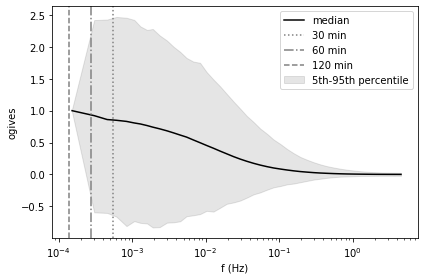

In [6]:
plot_ogives(df)